In [ ]:
# 1. Importing Required Libraries

In [5]:
import pandas as pd               # To read and manipulate tabular data
import numpy as np                # For numerical computations
import matplotlib.pyplot as plt   # To create charts and plots
import seaborn as sns             # For visually appealing graphs

In [ ]:
# 2. Load and Preview the Dataset

In [11]:
data = pd.read_csv('netflix1.csv', lineterminator = '\n')

In [12]:
data.head() # Show first 5 rows

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in\r
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries\r
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries\r"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies\r"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movi..."


In [9]:
# 3. Understand Data Structure and Size

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
    8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [14]:
# 4. Remove Duplicate Records

In [16]:
data = data.drop_duplicates()

In [17]:
# 5. Count Movie vs TV Show Content

Text(0.5, 0.98, 'Total Content on Netflix')

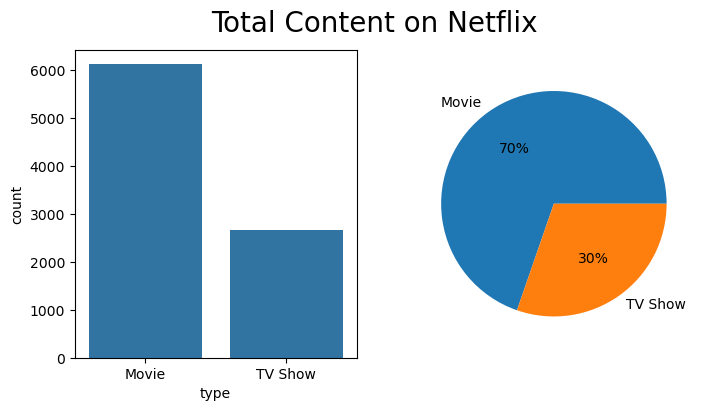

In [18]:
freq = data['type'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Bar chart
sns.countplot(data=data, x='type', ax=axes[0])  

# Pie chart
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')  
plt.suptitle('Total Content on Netflix', fontsize=20)


In [19]:
# 6. Convert ‘date_added’ to Proper Date Format

In [20]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [21]:
# 7. Basic Stats

In [22]:
data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [23]:
# 8. Countries with Most Content

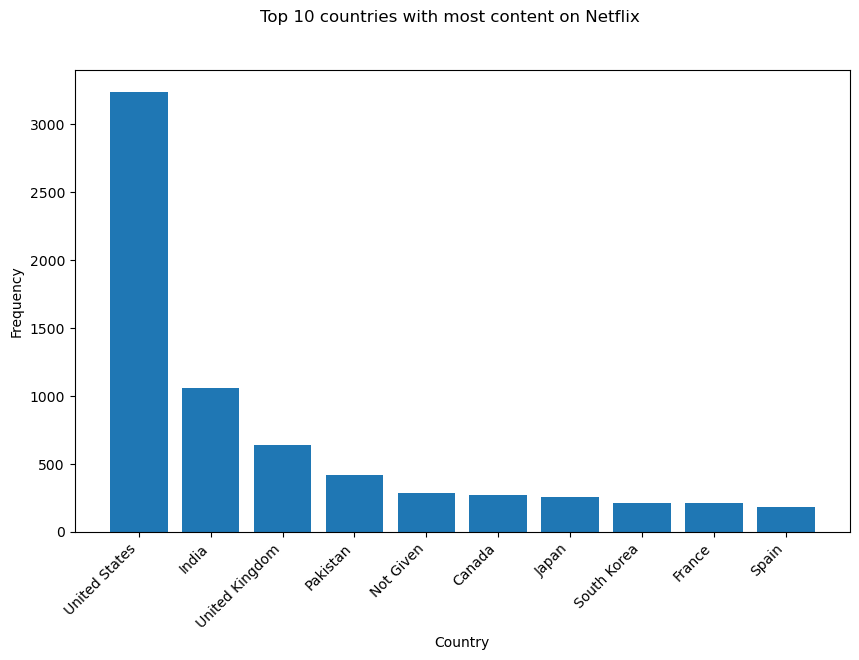

In [43]:
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

In [ ]:
# 9. Monthly and Yearly Release Trends

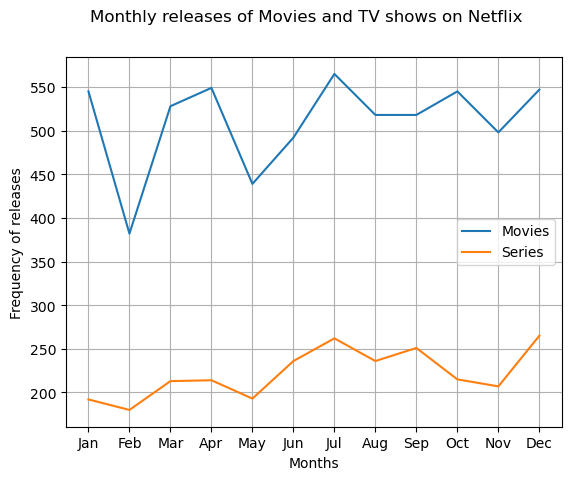

In [25]:
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month

monthly_movie_release = data[data['type'] == 'Movie']['month'].value_counts().sort_index()
monthly_series_release = data[data['type'] == 'TV Show']['month'].value_counts().sort_index()

plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

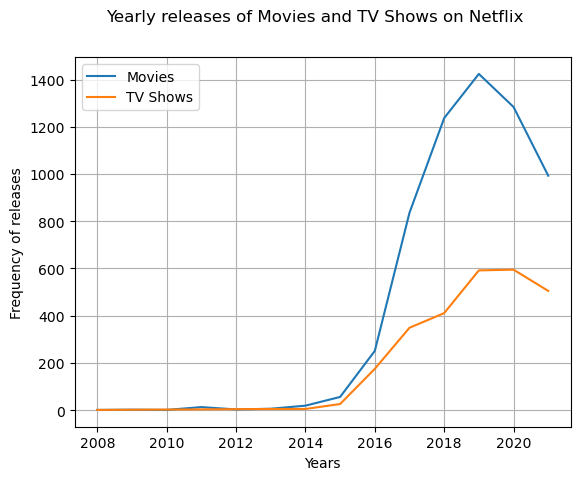

In [26]:
yearly_movie_releases = data[data['type'] == 'Movie']['year'].value_counts().sort_index()
yearly_series_releases = data[data['type'] == 'TV Show']['year'].value_counts().sort_index()

plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()
plt.show()

In [27]:
# 10. Top Movie and TV Show Genres

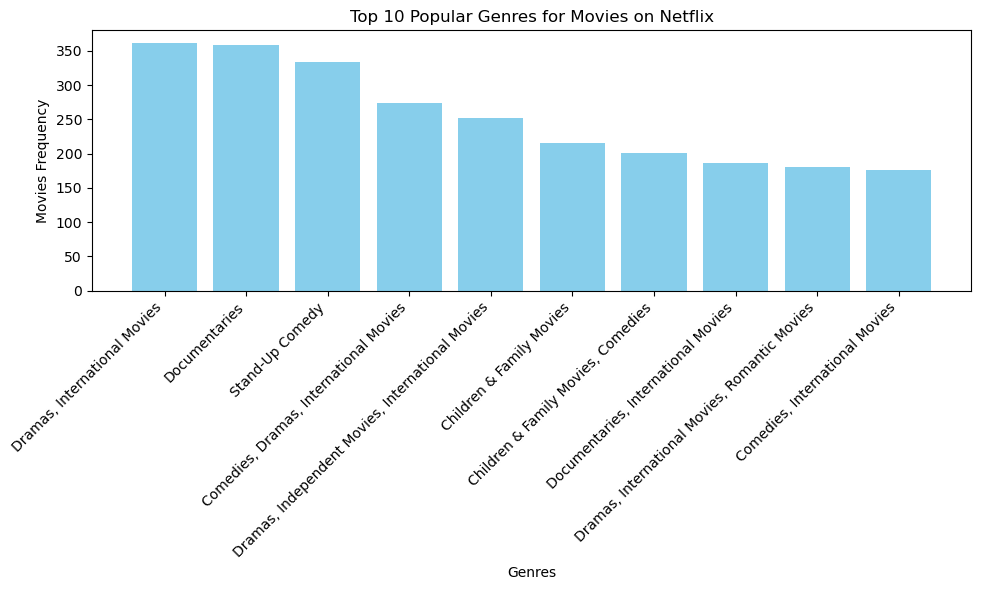

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('netflix1.csv')  # Update filename

# Drop rows with NaN in 'listed_in'
data = data[data['listed_in'].notna()]

# Top 10 popular movie genres
popular_movie_genre = data[data['type'] == 'Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(popular_movie_genre.index, popular_movie_genre.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.title("Top 10 Popular Genres for Movies on Netflix")
plt.tight_layout()
plt.show()


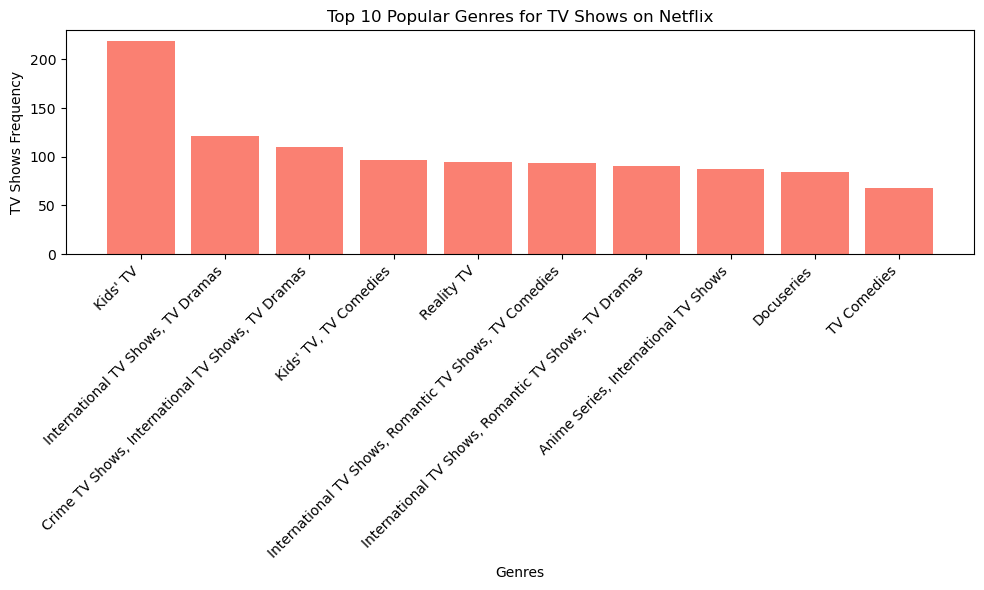

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


# Ensure 'listed_in' column has no missing values
data = data[data['listed_in'].notna()]

# Get top 10 popular genres for TV Shows
popular_series_genre = (
    data[data['type'] == 'TV Show']
    .groupby("listed_in")
    .size()
    .sort_values(ascending=False)[:10]
)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(popular_series_genre.index, popular_series_genre.values, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.title("Top 10 Popular Genres for TV Shows on Netflix")
plt.tight_layout()
plt.show()


In [ ]:
# 11. Top 15 Directors with Most Titles

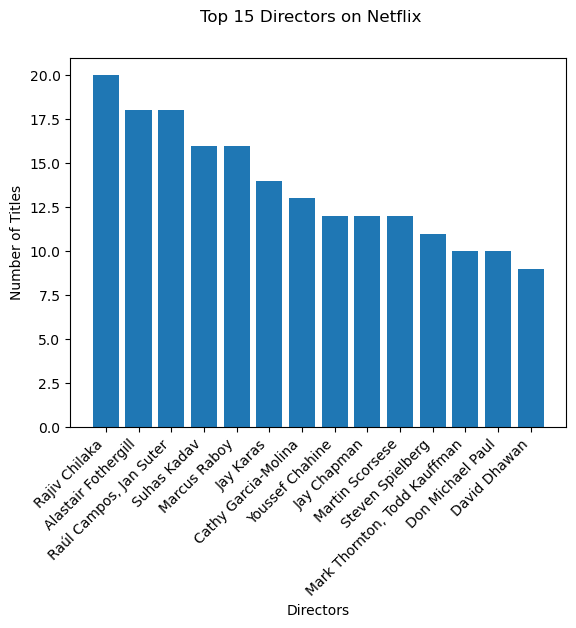

In [42]:
directors = data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')
plt.suptitle("Top 15 Directors on Netflix")
plt.xlabel("Directors")
plt.ylabel("Number of Titles")
plt.show()